In [98]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import pandas as pd
import seaborn as sns

import wandb

<AxesSubplot:>

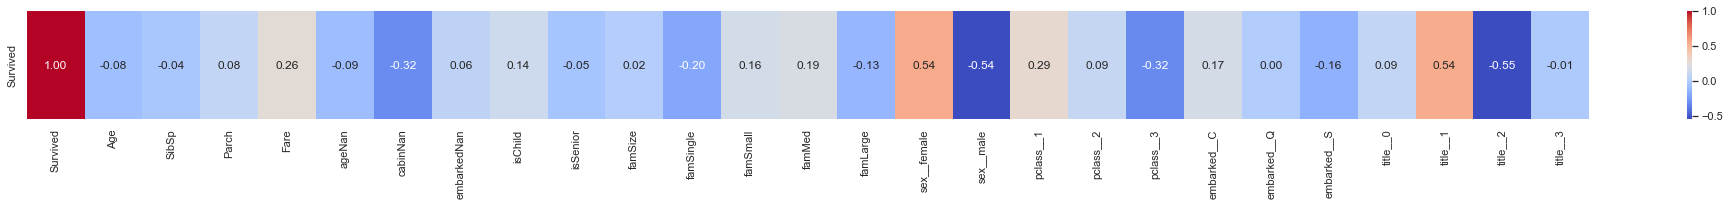

In [99]:
df = pd.read_csv('data/train.csv')

# store whether some fields are not given as new feature
df['ageNan'] = df['Age'].apply(lambda x: pd.isna(x)).astype(bool)
df['cabinNan'] = df['Cabin'].apply(lambda x: pd.isna(x)).astype(bool)
df['embarkedNan'] = df['Embarked'].apply(lambda x: pd.isna(x)).astype(bool)

# create a feature that says whether a person is a child (age < 16) or a senor (age > 60)
df['isChild'] = df['Age'].apply(lambda x: x < 16).astype(bool)
df['isSenior'] = df['Age'].apply(lambda x: x > 60).astype(bool)

# extract title (taken from: https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling)
df['title'] = [i.split(',')[1].split('.')[0].strip() for i in df['Name']]
df['title'] = df['title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['title'] = df['title'].map({'Master': 0, 'Miss': 1, 'Ms': 1 , 'Mme': 1, 'Mlle': 1, 'Mrs': 1, 'Mr': 2, 'Rare': 3})

# family size (taken from: https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling)
df['famSize'] = df['SibSp'] + df['Parch'] + 1
df['famSingle'] = df['famSize'].map(lambda x: 1 if x == 1 else 0)
df['famSmall'] = df['famSize'].map(lambda x: 1 if  x == 2  else 0)
df['famMed'] = df['famSize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
df['famLarge'] = df['famSize'].map(lambda s: 1 if s >= 5 else 0)

# one-hot-encoding of categorical fields (sex, class and embarked)
df = pd.concat([
    df,
    pd.get_dummies(df['Sex'], dtype='bool', prefix='sex_'),
    pd.get_dummies(df['Pclass'], dtype='bool', prefix='pclass_'),
    pd.get_dummies(df['Embarked'], dtype='bool', prefix='embarked_'),
    pd.get_dummies(df['title'], prefix='title_')
], axis=1)
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Sex', 'Pclass', 'Embarked', 'title'], axis=1)


sns.set(rc={'figure.figsize':(35,2)})
sns.heatmap(df.corr()[:1], annot=True, fmt='.2f', cmap='coolwarm')
